# Real Estate Market Analysis

## Data Loading and Sample Display

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]

## Question 1: Which US Real Estate Market is Doing Best Overall?

In [5]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank
35,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000
12,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667
122,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000
128,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000
6,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667
100,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333
26,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333
57,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333
48,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667
83,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000


### **ZHVI_Latest**
- **Definition**:  
  The Zillow Home Value Index (ZHVI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZHVI provides an average property value (home price) within a region.
  - **Price Appreciation**: How property values have grown over time.
  - **Market Demand**: Higher ZHVI values indicate a stronger demand for housing in that area.

---

### **ZORI_Latest**
- **Definition**:  
  The Zillow Observed Rent Index (ZORI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZORI tracks the average rent prices across a region. 
  - **Rental Yields**: Comparing rental income to property prices.
  - **Profitability for Landlords**: Higher ZORI values mean higher rental income potential.

---

### **How These Columns Were Created**
These columns were extracted and renamed from the original datasets to make them easier to understand and work with:

- **ZHVI_Latest** is derived from the ZHVI dataset (`zhvi_data`).
- **ZORI_Latest** is derived from the ZORI dataset (`zori_data`).
- The renaming ensures clarity in tracking the most recent metrics.


### **Why They Matter**

Together, **ZHVI** and **ZORI** provide a comprehensive view of a real estate market:

- **ZHVI** helps evaluate appreciation potential and market strength.
- **ZORI** indicates rental income potential and profitability for rental investments.
- Comparing the two allows investors to identify markets with both rising property values and strong rental returns.


### Visualization of Top 10 Performing Markets

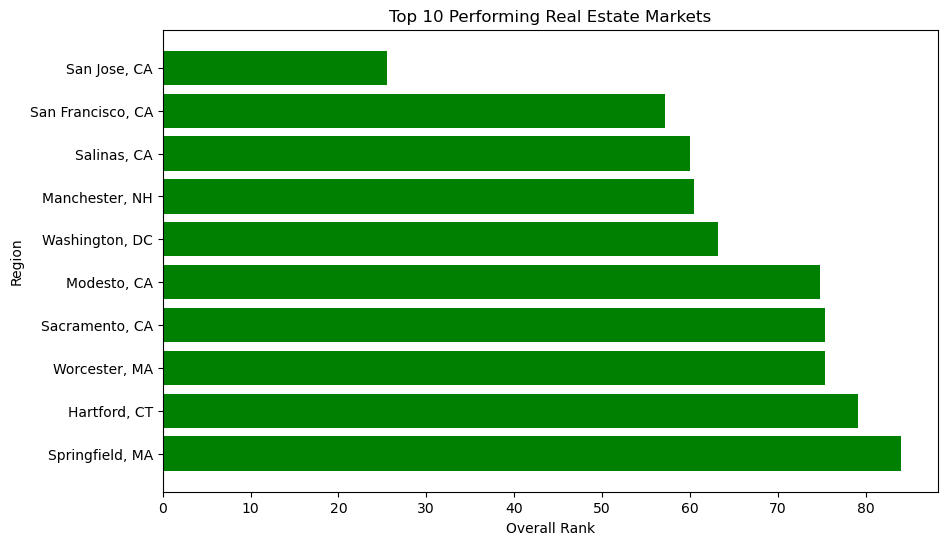

In [6]:

# Bar chart for overall rank
plt.figure(figsize=(10, 6))
plt.barh(top_markets['RegionName'], top_markets['Overall_Rank'], color='green')
plt.xlabel('Overall Rank')
plt.ylabel('Region')
plt.title('Top 10 Performing Real Estate Markets')
plt.gca().invert_yaxis()
plt.show()

### **Bar Chart: Top 10 Performing Real Estate Markets**

### **Why Lower Overall Rank Is Better**

- **Higher Performance Across Metrics**:  
  A lower overall rank means the market consistently excels in the evaluated areas:
  - **Price Growth (ZHVI)**
  - **Rental Returns (ZORI)**
  - **Competitiveness (Market Activity)**

- **Comparative Ranking**:  
  The system ranks markets relative to one another. For example:
  - A market with **Rank 1 for ZHVI**, **Rank 2 for ZORI**, and **Rank 1 for Market Activity** has an **average overall rank of 1.33**, making it highly competitive.
  - A market with **Rank 5, Rank 6, and Rank 7** has an **average overall rank of 6.0**, indicating lower performance compared to the first market.

---

### **Insight 1**
- **San Jose, CA**:  
  If it has the lowest overall rank, it likely performs exceptionally well in price appreciation and market activity, even if its rental yields are moderate.
  
- **Springfield, MA**:  
  If it has a higher overall rank, it might perform well in rental yields but less so in price appreciation or market activity.


### **Insight 2**:
- Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their strong price appreciation, despite relatively moderate rental yields.
- **Salinas, CA** and **Manchester, NH** offer a mix of competitive rental yields and moderate market activity, making them attractive for investors looking for balanced opportunities.


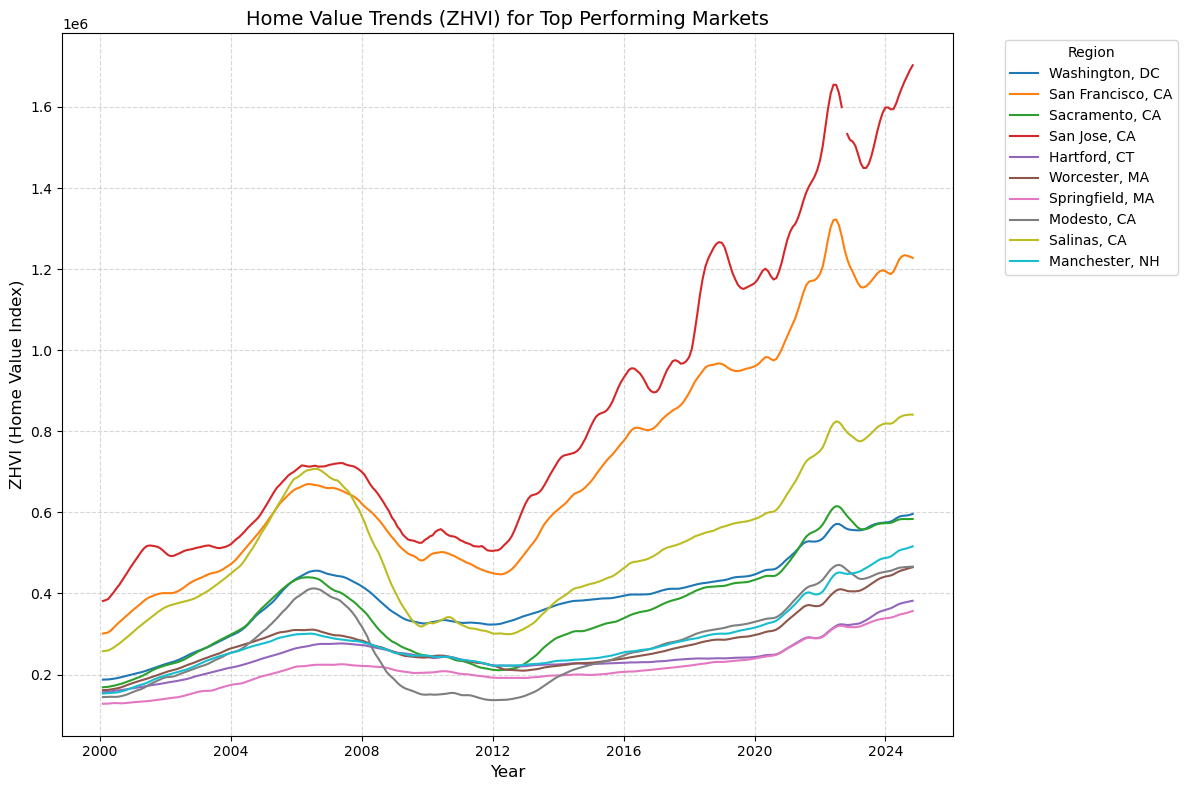

In [7]:
import matplotlib.pyplot as plt

# Extract trends for top market from zhvi
top_market_regions = top_markets['RegionName'].unique()
zhvi_trends = zhvi_data[zhvi_data['RegionName'].isin(top_market_regions)]

# Transpose data for plotting (columns as dates, rows as regions)
zhvi_trends = zhvi_trends.set_index('RegionName').drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
zhvi_trends.index = pd.to_datetime(zhvi_trends.index)  # Convert dates to datetime for better plotting

# Plot the trends
plt.figure(figsize=(12, 8))
for region in zhvi_trends.columns:
    plt.plot(zhvi_trends.index, zhvi_trends[region], label=region)

plt.title("Home Value Trends (ZHVI) for Top Performing Markets", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ZHVI (Home Value Index)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

### **Home Value Trends Visualization**

**Line Chart: Home Value Trends (ZHVI) for Top Performing Markets**

- **What It Shows**:  
  This chart tracks how home values (ZHVI) have changed over time in the top 10 real estate markets. Each line represents the average property value in a market, allowing us to compare their growth trends.

- **Key Insights**:
  1. **Fast-Growing Markets**:  
     Cities like *San Jose, CA* and *San Francisco, CA* show sharp increases in home values, indicating strong demand and rapid appreciation. These markets are great for investors who want to buy, upgrade, and sell quickly to maximize profits.
  2. **Steady Growers**:  
     Areas such as *Salinas, CA* and *Manchester, NH* have slower but consistent growth. These markets are better for long-term investments, as their steady increases suggest stability and lower risk.
  3. **Stable or Cooling Markets**:  
     Some regions with flatter lines might be reaching a peak or cooling off. While these areas may not offer as much price appreciation, they could still be profitable for rental income.

- **Why It Matters**:  
  - Steeper lines show markets where property values are growing rapidly, which can lead to higher profits if you sell soon.  
  - Gradual, steady growth suggests reliable markets where property values are less volatile, making them ideal for long-term investments.  
  - Flat trends indicate stable markets, which might still be good for renting out properties or holding for future appreciation.

- **How to Use This Information**:  
  - If you want quick profits, focus on markets with sharp growth like *San Jose* or *San Francisco*.  
  - For steady income and long-term value, look at consistent growers like *Salinas* or *Springfield*.  
  - The chart helps you decide if a market is still growing, stable, or slowing down, so you can plan your investment accordingly.


### **Conclusion for Question 1: Which US Real Estate Market is Doing Best Overall?**

Based on the analysis, the top-performing real estate markets are determined by their strong performance in price appreciation (ZHVI), rental yields (ZORI), and market activity (temperature index). Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their consistent price growth and competitive nature. However, regions such as **Salinas, CA** and **Manchester, NH** offer a balance of moderate price appreciation and high rental yields, making them attractive for long-term investments.

- **High Growth Markets**: *San Jose, CA* and *San Francisco, CA* excel in appreciation, ideal for flipping or short-term investments.
- **Balanced Growth and Rental Yield Markets**: *Salinas, CA* and *Springfield, MA* provide steady price growth and strong rental yields, making them favorable for long-term investments.

Overall, the best market depends on your investment strategy. If rapid price appreciation is the priority, focus on competitive markets with high demand. For consistent returns, target markets with a balance of moderate appreciation and strong rental yields.

---

## Question 3: Should You Invest Now or Wait? Where Should You Invest?

In [21]:

# Load the datasets 
inventory_data = pd.read_csv("FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv")
dttp_data = pd.read_csv("DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv")

# Verify data has been loaded- spot check
print(inventory_data.head())
print(dttp_data.head())


   RegionID  SizeRank       RegionName RegionType StateName  2018-03-31  \
0    102001         0    United States    country       NaN   1256842.0   
1    394913         1     New York, NY        msa        NY     52726.0   
2    753899         2  Los Angeles, CA        msa        CA     17825.0   
3    394463         3      Chicago, IL        msa        IL     29930.0   
4    394514         4       Dallas, TX        msa        TX     22961.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2024-01-31  \
0   1326697.0   1412968.0   1479263.0   1527469.0  ...    780613.0   
1     57399.0     62374.0     66396.0     68302.0  ...     20884.0   
2     19309.0     20822.0     22059.0     23397.0  ...     12270.0   
3     32526.0     35219.0     36854.0     38278.0  ...     18425.0   
4     24748.0     27040.0     29241.0     31113.0  ...     20630.0   

   2024-02-29  2024-03-31  2024-04-30  2024-05-31  2024-06-30  2024-07-31  \
0    762455.0    790722.0    835941.0    898309.0  

In [22]:
# Analyze inventory and days on market trends
inventory_latest = inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory_Latest'})
dttp_latest = dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket_Latest'})

# Merge with top markets data
investment_data = pd.merge(top_markets, inventory_latest, on=['RegionName', 'StateName'], how='inner')
investment_data = pd.merge(investment_data, dttp_latest, on=['RegionName', 'StateName'], how='inner')

# Display investment data
investment_data

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank,Inventory_Latest,DaysOnMarket_Latest
0,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000,1933.0,28.0
1,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667,6139.0,36.0
2,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000,599.0,43.0
3,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000,530.0,19.0
4,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667,10456.0,29.0
5,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333,946.0,35.0
6,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333,5598.0,38.0
7,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333,1672.0,26.0
8,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667,1833.0,20.0
9,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000,1132.0,25.0


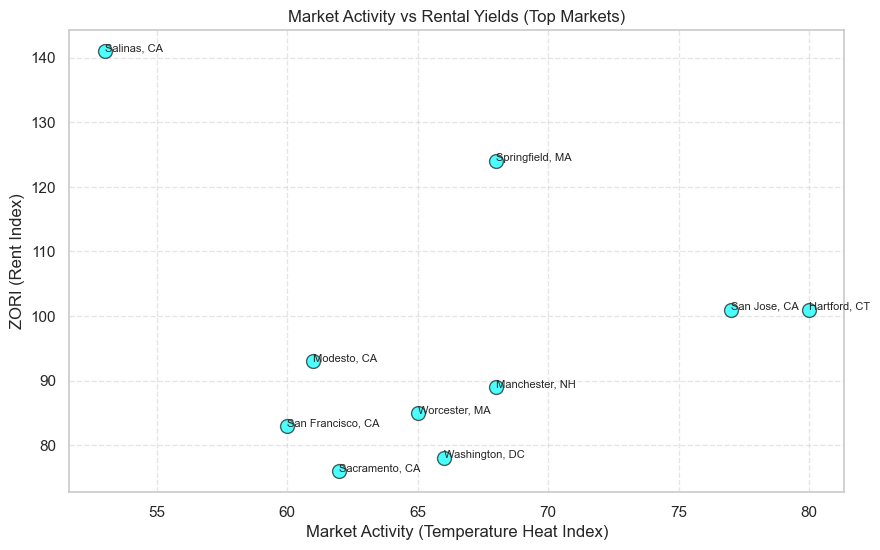

In [23]:
# Scatter plot: Market Activity vs Rental Yields
plt.figure(figsize=(10, 6))
plt.scatter(investment_data['MarketTemp_Latest'], investment_data['ZORI_Latest'], color='cyan', s=100, edgecolors='k', alpha=0.7)
for i, region in enumerate(investment_data['RegionName']):
    plt.text(investment_data['MarketTemp_Latest'].iloc[i], investment_data['ZORI_Latest'].iloc[i], region, fontsize=8)

plt.xlabel('Market Activity (Temperature Heat Index)')
plt.ylabel('ZORI (Rent Index)')
plt.title('Market Activity vs Rental Yields (Top Markets)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Market Activity vs Rental Yields**

This scatter plot illustrates the relationship between **Market Activity (Temperature Heat Index)** and **Rental Yields (ZORI)** in the top-performing real estate markets. It helps identify the type of opportunities each market offers based on competition and rental income potential.

- **High Rental Yields, Moderate Competition**:  
  Markets with strong rental yields but lower competition (low temperature index) could be undervalued gems. These areas may provide great opportunities for rental investments with less competition from other buyers. For example, if a market has high ZORI but relatively low Market Activity, it’s likely a lucrative market for rental income.

- **Highly Competitive Markets**:  
  In markets with high activity (high temperature index), such as **San Jose, CA**, rental yields might be lower, but these areas excel in price appreciation. Such markets are ideal for investors interested in flipping or selling upgraded properties quickly at a profit.

- **Key Takeaway**:  
  This plot helps investors balance their strategies:  
  - For rental income, focus on markets with high ZORI and moderate competition.  
  - For flipping and quick resale, target markets with high competition and appreciation potential.  
  Use this visualization to identify which markets align with your investment goals.


<Figure size 1000x800 with 0 Axes>

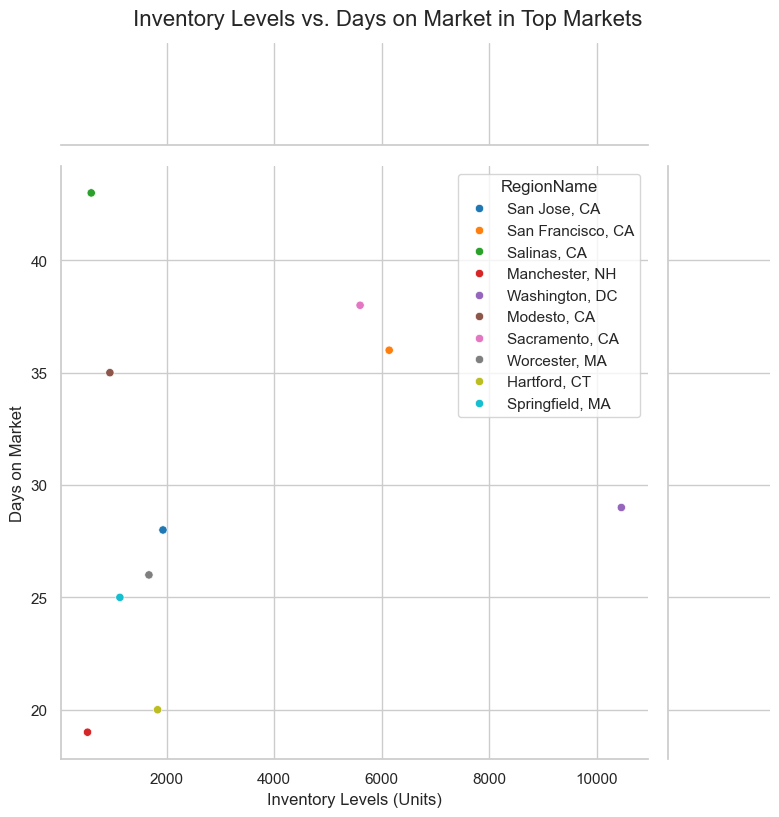

In [24]:
# Merge inventory and days on market data with the top markets
investment_data = pd.merge(top_markets, inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory_Latest'}), on=['RegionName', 'StateName'], how='inner')
investment_data = pd.merge(investment_data, dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket_Latest'}), on=['RegionName', 'StateName'], how='inner')

# Create the joint plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.jointplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    kind="scatter",
    hue="RegionName",
    palette="tab10",
    height=8,
    marginal_kws=dict(bins=20, fill=True),
)

plt.suptitle("Inventory Levels vs. Days on Market in Top Markets", y=1.02, fontsize=16)
plt.xlabel("Inventory Levels (Units)")
plt.ylabel("Days on Market")
plt.show()


### **Scattr Plot: Inventory Levels vs. Days on Market**

This visualization explores the relationship between **Inventory Levels** and **Days on Market** in the top-performing real estate markets. 

  - **Scatter Plot**: Each point represents a market (region), showing how much inventory is available (x-axis) and how quickly homes are selling (y-axis).
  - **Hue for Region Names**: Each market is color-coded to help differentiate between the top-performing locations.
  - **Marginal Distributions**: Histograms along the axes show the distribution of inventory levels and days on market, revealing overall trends.

- **Key Insights**:
  1. **Low Inventory, Low Days on Market**:  
     Markets with low inventory and quick sales (e.g., low days on market) are highly competitive, making them ideal for flipping or quick resale. These markets indicate high buyer demand and fast-moving properties.
  2. **High Inventory, High Days on Market**:  
     Markets with higher inventory and longer days on market may offer opportunities for investors to negotiate better deals. These areas are more suited for rental investments, where securing a property at a lower cost may yield higher returns over time.
  3. **Balanced Markets**:  
     Some markets show moderate inventory levels and days on market, striking a balance between availability and demand. These markets can be a good choice for both flipping and long-term investments.

- **Why I care**:  
  This visualization helps you identify markets that align with your goals:
  - For **quick resale**: Look for markets with low inventory and days on market.  
  - For **long-term rental investments**: Focus on markets with higher inventory, as they may provide more favorable purchase conditions.

This scatter plot should show how competitive a market is.


### **Should You Invest Now or Wait? Where Should You Invest?**

Given the current market trends, **now is a favorable time to invest** in real estate. Many markets demonstrate strong price growth and competitive activity, suggesting demand remains high. 

- **Invest Now If**: You aim to capitalize on current market dynamics, particularly in competitive regions with strong price appreciation like **San Jose, CA**. Quick resale opportunities are better in these high-demand markets.
- **Recommended Markets**:
  - For rental income: *Salinas, CA* and *Springfield, MA*, with strong rental yields and moderate competition.
  - For flipping: *San Francisco, CA* and *San Jose, CA*, where price appreciation remains robust, and demand is strong.

Investing now in the above chosen markets to yield significant returns.